# Linear regression

In [104]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from statsmodels.tools.eval_measures import stde

## Read the etl info results

In [105]:
df_info = pd.read_csv('../dataset_clean/options_csv_v1_etl.csv')
df_info

,remove_time_features,generic_features,remove_atypical_values,feature_combination,remove_feature_selection,remove_invalid_correlated_features
0,False,True,False,False,False,False


## Read the dataset

In [106]:
df = pd.read_csv('../dataset_clean/PlatteRiverWeir_features_v1_clean.csv')
df

,SensorTime,CaptureTime,Stage,Discharge,grayMean,graySigma,entropyMean,entropySigma,hMean,hSigma,sMean,sSigma,vMean,vSigma
0,2012-06-09 13:15:00,2012-06-09T13:09:07,2.99,916.0,97.405096,39.623303,0.203417,0.979825,105.368375,41.572939,124.520218,4.111846,132.405971,14.983367
1,2012-06-09 13:15:00,2012-06-09T13:10:29,2.99,916.0,104.066757,40.179745,0.206835,1.002624,112.399458,41.795584,124.317679,4.270429,133.070221,15.334166
2,2012-06-09 13:45:00,2012-06-09T13:44:01,2.96,873.0,105.636831,40.533218,0.204756,0.994246,114.021526,42.145582,124.304621,4.310293,133.294541,15.502448
3,2012-06-09 14:45:00,2012-06-09T14:44:30,2.94,846.0,104.418949,41.752678,0.202428,0.983170,112.612830,43.575351,124.369736,4.120586,133.458381,15.190064
4,2012-06-09 15:45:00,2012-06-09T15:44:59,2.94,846.0,106.763541,44.442097,0.202661,0.989625,114.839424,46.302008,124.283191,4.088480,133.573595,14.801143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42054,2019-10-11 09:00:00,2019-10-11T08:59:53,2.54,434.0,82.872720,57.702652,0.221708,1.076393,87.260572,61.485334,127.807813,2.564157,124.073149,13.757842
42055,2019-10-11 10:00:00,2019-10-11T09:59:52,2.54,434.0,89.028383,55.840861,0.233168,1.124774,94.175906,59.006132,127.336000,2.585121,124.882812,13.234735
42056,2019-10-11 11:00:00,2019-10-11T10:59:52,2.54,434.0,94.722097,54.355753,0.240722,1.151833,100.534577,56.921028,126.958768,2.774867,126.145409,13.408480
42057,2019-10-11 12:00:00,2019-10-11T11:59:53,2.54,434.0,96.693270,52.787629,0.244789,1.171987,102.891159,55.083532,126.679956,2.998683,127.508063,13.863205


In [107]:
df['SensorTime'] = pd.to_datetime(df['SensorTime'])
df['Year'] = df['SensorTime'].dt.year

In [108]:
df_train = df[(df.Year >= 2012) & (df.Year <= 2017)]
df_test = df[(df.Year >= 2018) & (df.Year <= 2019)]

In [109]:
df_train = df_train.drop(columns=["Year", "SensorTime", "CaptureTime"])
df_test = df_test.drop(columns=["Year", "SensorTime", "CaptureTime"])

## Divide dataset to X and Y

In [110]:
y_train = df_train[["Stage", "Discharge"]]
X_train = df_train.drop(columns=["Stage", "Discharge"])
y_test = df_test[["Stage", "Discharge"]]
X_test = df_test.drop(columns=["Stage", "Discharge"])

In [111]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Train model

In [112]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearRegression())
])

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
clf = cross_val_score(pipeline, X_train, y_train, scoring='r2', cv=folds)

In [113]:
clf

array([0.35480337, 0.34735783, 0.35186074, 0.3379347 , 0.35390495])

In [114]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LinearRegression())])

## Test Model

In [115]:
y_pred = pipeline.predict(X_test)

In [116]:
print("R^2: ", r2_score(y_test, y_pred))
print("mse: ", mean_squared_error(y_test, y_pred))
print("rmse: ", mean_squared_error(y_test, y_pred, squared=False))
print("mae: ", mean_absolute_error(y_test, y_pred))
print("mape: ", mean_absolute_percentage_error(y_test, y_pred))
print("Error estandar: ", stde(y_test.squeeze(),
      y_pred.squeeze(), ddof=len(X_train.columns) + 1))


R^2:  0.20765578843687355
mse:  250149.23256003836
rmse:  353.9215663151034
mae:  289.14866835681914
mape:  3.631923146666917e+16
Error estandar:  [4.53599216e-01 6.20381370e+02]


In [117]:
residuals = y_test - y_pred
residuals

,Stage,Discharge
28811,-0.634446,-1035.924075
28812,0.860892,845.054275
28813,0.651571,615.180653
28814,0.651607,653.184582
28815,-0.261186,-480.739190
...,...,...
42054,0.022499,53.364330
42055,0.052229,80.122600
42056,0.024390,20.047555
42057,-0.007539,-45.129367


Text(0, 0.5, 'Standarized residuals stage')

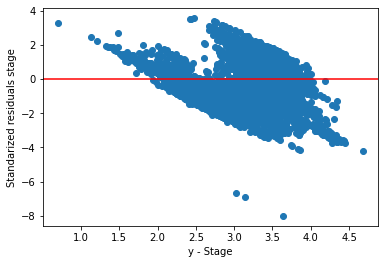

In [118]:
resid = np.array(residuals["Stage"])
norm_resid = resid / resid.std()

plt.scatter([i[0] for i in y_pred], norm_resid)
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y - Stage")
plt.ylabel("Standarized residuals stage")

Text(0, 0.5, 'Standarized residuals Discharge')

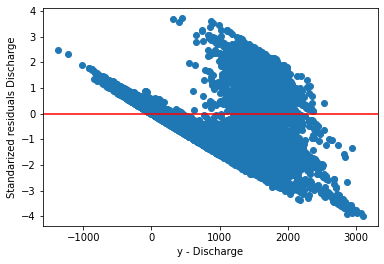

In [119]:
resid = np.array(residuals["Discharge"])
norm_resid = resid / resid.std()

plt.scatter([i[1] for i in y_pred], norm_resid)
plt.axhline(y = 0.0, color = 'r', linestyle = '-')
plt.xlabel("y - Discharge")
plt.ylabel("Standarized residuals Discharge")